## Dataset exploration

In [1]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head(10)

,id,url,title,text,label
0,32636,https://eml.wikipedia.org/wiki?curid=32636,.iveco,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
1,32637,https://eml.wikipedia.org/wiki?curid=32637,.case,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
2,32638,https://eml.wikipedia.org/wiki?curid=32638,.caseih,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
3,32639,https://eml.wikipedia.org/wiki?curid=32639,.baseball,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
4,32640,https://eml.wikipedia.org/wiki?curid=32640,.newholland,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
5,32641,https://eml.wikipedia.org/wiki?curid=32641,.aol,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
6,32642,https://eml.wikipedia.org/wiki?curid=32642,.free,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
7,32643,https://eml.wikipedia.org/wiki?curid=32643,.food,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
8,32661,https://eml.wikipedia.org/wiki?curid=32661,.box,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0
9,32672,https://eml.wikipedia.org/wiki?curid=32672,.cruise,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0


In [2]:
dial_label = {
    0 : 'EML',
    1 : 'NAP',
    2 : 'PMS',
    3 : 'FUR',
    4 : 'LLD',
    5 : 'LIJ',
    6 : 'LMO',
    7 : 'ROA_TARA',
    8 : 'SCN', 
    9 : 'VEC',
    10 : 'SC'
}

fold_label = {
    'EML' : 0,
    'NAP' : 1,
    'PMS' : 2,
    'FUR' : 3,
    'LLD' : 4,
    'LIJ' : 5,
    'LMO' : 6,
    'ROA_TARA' : 7,
    'SCN' : 8,
    'VEC' : 9,
    'SC' : 10
}

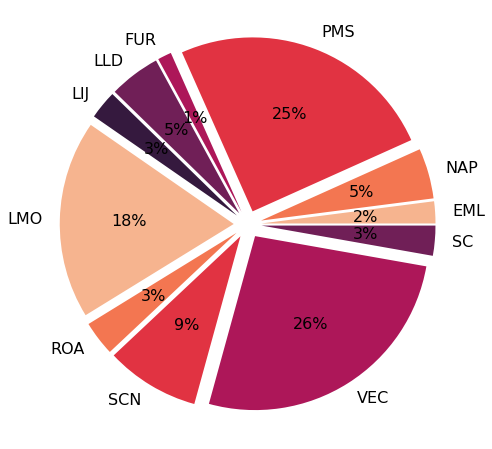

In [3]:
counts = df.groupby('label').count()['id']

import matplotlib.pyplot as plt
import seaborn as sns

labels = [x[:3] for x in fold_label.keys()]
colors = sns.color_palette('rocket_r')[0:11]

plt.figure(figsize=(8,8))

plt.pie(counts, explode=[0.08]*11, labels = labels, colors = colors, autopct='%.0f%%', textprops={'fontsize': 16})
#plt.savefig('figure1.pdf', bbox_inches='tight')
plt.show()

In [5]:
from nltk.tokenize import sent_tokenize
counts = [[0]*11, [0]*11]
for l in range(11):
    texts = df[df['label']==l]['text']
    for t in texts:
        numsen = len(sent_tokenize(t))
        if numsen > 2:
            counts[0][l] += 1
        else:
            counts[1][l] += 1

In [6]:
import numpy as np
counts = np.array(counts)

In [7]:
counts

array([[  615,  1913, 22748,  1432,  1053,  2205, 31948,   606,  7534,
         7512,  3949],
       [ 4387,  9566, 38389,  1718, 10617,  4299, 13245,  7295, 13842,
        57446,  2874]])

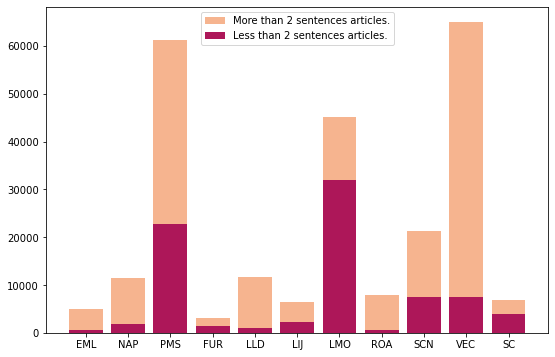

In [8]:
plt.figure(figsize=(9,6))

plt.bar(labels, height=counts[1]+counts[0], label="More than 2 sentences articles.", color=colors[:1])
plt.bar(labels, height=counts[0], label="Less than 2 sentences articles.", color=colors[3:4])

plt.legend(loc='upper center')
#plt.savefig('figure2.pdf', bbox_inches='tight')
plt.show()